In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading files

train = pd.read_csv("C:\\Users\\AJAY\\Amex\\train_amex\\train.csv")
test = pd.read_csv("C:\\Users\\AJAY\\Amex\\test_LNMuIYp\\test.csv")
print(train.shape)
train.head()

(463291, 15)


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [2]:
print(test.shape)
test.head()

(128858, 14)


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1


In [3]:
train['is_click'].value_counts()

0    431960
1     31331
Name: is_click, dtype: int64

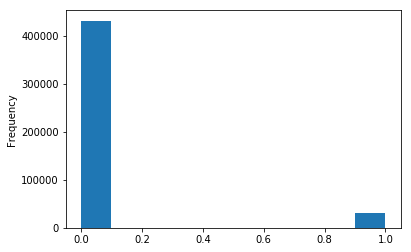

In [4]:
train["is_click"].astype(int).plot.hist()

In [5]:
# Checking missing Values
train.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [6]:
# Checking Percentage of missing values in train dataset
miss_val_percent = 100*train.isnull().sum()/len(train)
miss_val_percent

session_id                 0.000000
DateTime                   0.000000
user_id                    0.000000
product                    0.000000
campaign_id                0.000000
webpage_id                 0.000000
product_category_1         0.000000
product_category_2        78.968510
user_group_id              3.937698
gender                     3.937698
age_level                  3.937698
user_depth                 3.937698
city_development_index    27.008727
var_1                      0.000000
is_click                   0.000000
dtype: float64

In [7]:
# Checking Percentage of missing values in test dataset
miss_val_percentt = 100*test.isnull().sum()/len(test)
miss_val_percentt

session_id                 0.000000
DateTime                   0.000000
user_id                    0.000000
product                    0.000000
campaign_id                0.000000
webpage_id                 0.000000
product_category_1         0.000000
product_category_2        59.112356
user_group_id              4.411057
gender                     4.411057
age_level                  4.411057
user_depth                 4.411057
city_development_index    26.858247
var_1                      0.000000
dtype: float64

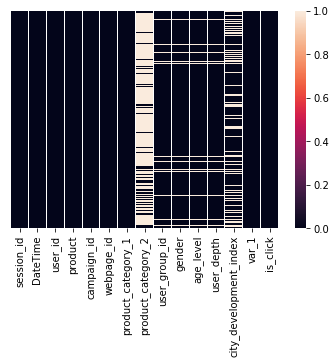

In [8]:
# In both train and test dataset product_category_2 has highest number of missing 
# values which is more than 50 percent.
# Analyzing the missing values in train dataset through heatmap
sns.heatmap(train.isnull(),yticklabels = False)

In [9]:
train['source'] = 'train'
test['source'] = 'test'
# We are combinig both test and train dataset , so that there is no need to apply operation separetely on both train and test
# dataset.

data = pd.concat([train,test],ignore_index = True, sort = False)
print(train.shape,test.shape,data.shape)

(463291, 16) (128858, 15) (592149, 16)


In [10]:
# Imputing the missing values in column
for col in('user_group_id','gender','age_level','user_depth', 'city_development_index'):
    data[col].fillna(data[col].mode()[0], inplace = True)

In [11]:
# We are droping the 'DateTime','user_id','product_category_2' column because in Product_category_2 most of the values 
# are missing and dropping  DateTime and user_id doesn't effect our result
data.drop(['DateTime','user_id','product_category_2'],axis = 1, inplace = True)

In [12]:
data.describe()

,session_id,campaign_id,webpage_id,product_category_1,user_group_id,age_level,user_depth,city_development_index,var_1,is_click
count,592149.000000,592149.000000,592149.000000,592149.000000,592149.000000,592149.000000,592149.000000,592149.000000,592149.000000,463291.000000
mean,297956.488372,292109.671470,28837.971259,3.166571,3.469769,2.798961,2.882925,2.407735,0.414529,0.067627
std,172005.257072,132675.251267,20884.388892,1.349075,2.374897,1.053987,0.393320,0.825552,0.492641,0.251105
min,1.000000,82320.000000,1734.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,149012.000000,118601.000000,13787.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,297727.000000,359520.000000,13787.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,446970.000000,404347.000000,51181.000000,4.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000
max,595813.000000,414149.000000,60305.000000,5.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000


In [13]:
data.isnull().sum()

session_id                     0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
user_group_id                  0
gender                         0
age_level                      0
user_depth                     0
city_development_index         0
var_1                          0
is_click                  128858
source                         0
dtype: int64

In [14]:
data.apply(lambda x: len(x.unique()))

session_id                592149
product                       10
campaign_id                   10
webpage_id                     9
product_category_1             5
user_group_id                 13
gender                         2
age_level                      7
user_depth                     3
city_development_index         4
var_1                          2
is_click                       3
source                         2
dtype: int64

In [15]:
# Find Co-relation amomg the is_click and sort it
corelation = data.corr()['is_click'].sort_values()
print('Most Positive Co-relation:\n',corelation.tail())
print('\nMost Negative Co-relation:\n',corelation.head())

Most Positive Co-relation:
 user_depth    -0.000823
var_1          0.011296
campaign_id    0.011447
webpage_id     0.041717
is_click       1.000000
Name: is_click, dtype: float64

Most Negative Co-relation:
 product_category_1       -0.016531
session_id               -0.011598
age_level                -0.009403
user_group_id            -0.007719
city_development_index   -0.004748
Name: is_click, dtype: float64


# Visualizing the Dataset

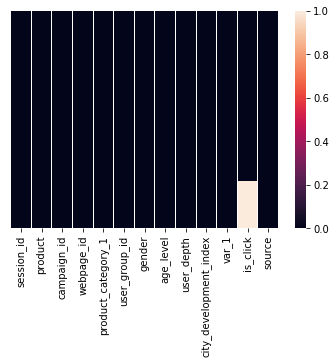

In [16]:
sns.heatmap(data.isnull(), yticklabels = False)

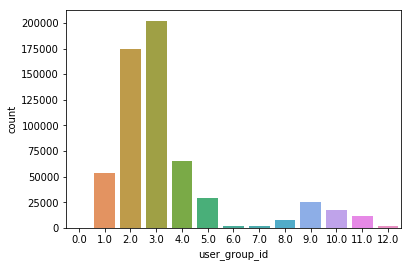

In [17]:
sns.countplot(x = "user_group_id", data = data)

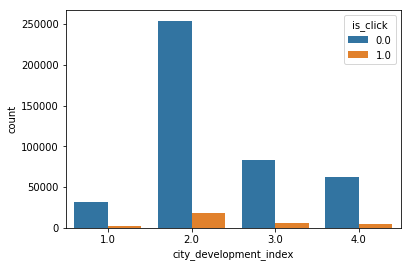

In [18]:
sns.countplot(x = "city_development_index", hue = "is_click", data = data)

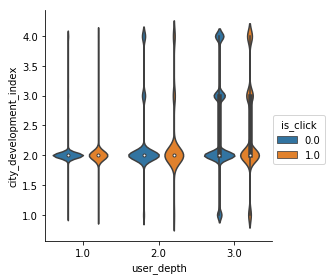

In [19]:
sns.factorplot(x ="user_depth",y ="city_development_index",hue = "is_click", kind = "violin" ,data = data)

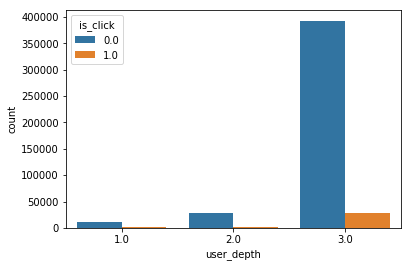

In [20]:
sns.countplot(x = "user_depth", hue = "is_click", data = data)

In [21]:
data.dtypes

session_id                  int64
product                    object
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
user_group_id             float64
gender                     object
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
is_click                  float64
source                     object
dtype: object

In [22]:
data = pd.get_dummies(data, columns = ['product','gender','user_group_id','age_level','user_depth','city_development_index'])

In [23]:
# Divide the data into train and test
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

# Drop the Unnecessary Column
train.drop(['source'], axis = 1, inplace = True)
test.drop(['source'], axis = 1, inplace=True)

X_train = train.drop(['session_id','is_click'],axis = 1)
Y_train = train['is_click']
X_test = test.drop(['session_id','is_click'],axis = 1).copy()

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Log_predication = logreg.predict(X_test)
acc_score = round(logreg.score(X_train, Y_train)*100,2)
acc_score

93.24

In [25]:
Logistic_submission = pd.DataFrame({'session_id': test["session_id"],
                                   'is_click':Log_predication})
Logistic_submission.to_csv("Logistic_submission.csv", index = False)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
decision_tree = DecisionTreeClassifier(max_depth = 250,min_samples_leaf = 40,random_state = 10)
decision_tree.fit(X_train,Y_train)
Decission_Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

93.24

In [32]:
submission = pd.DataFrame({'session_id': test["session_id"],
                           'is_click':Decission_Y_pred})
submission.to_csv("Decission_Tree_submission.csv", index = False)

In [33]:
random_forest = RandomForestClassifier(n_estimators =150,n_jobs = 35,random_state = 20)
random_forest.fit(X_train, Y_train)
Random_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100, 2)
acc_random_forest

93.28

In [34]:
submission = pd.DataFrame({'session_id': test["session_id"],
                           'is_click':Decission_Y_pred})
submission.to_csv("Random_Forest_submission.csv", index = False)

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs = 30,n_estimators = 10,max_depth = 10,learning_rate = 0.3)
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=30, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [36]:
xgb_predication =  xgb.predict(X_test)
acc_xgb = round(xgb.score(X_train,Y_train)*100,2)
acc_xgb

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


93.24

In [37]:
submission = pd.DataFrame({'session_id': test["session_id"],
                           'is_click':xgb_predication})
submission.to_csv("XGB_submission.csv",index = False)

In [39]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Gradient_Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100,2)
acc_sgd

93.24